# Servo Example

This example data has a small nonlinear set of sample.
It describes the behavior of a servo system, how it responds
to different setup conditions.
Our task is to predict the output value "class" from the inputs.

We will use Pandas to deal with the CSV data; Keras to learn the regression; and matplotlib to visualize the results.

In [1]:
# #Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!cat servo.domain

motor:A,B,C,D,E
screw:A,B,C,D,E
pgain:nominal:3,4,5,6
vgain:nominal:1,2,3,4,5
class:continuous


In [3]:
# Name data columns as given above
cols = ['motor','screw','pgain','vgain','class']

In [4]:
# Read the dataframe
df = pd.read_csv("servo.data",names=cols,header=None)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

/Users/markon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# Convert categorical variables into one-shot ones
df_ext = pd.get_dummies(df[cols])

# Shuffle the data to remove orderings
from sklearn.utils import shuffle
df_shuffled = shuffle(df_ext)

In [7]:
# Create training and test datasets
half = len(df_shuffled) // 2

# 'class' is the output, everything else is input
inputs = df_shuffled.drop('class',axis=1)
outputs = df_shuffled['class']
outputs = outputs / outputs.max()

X_train = inputs[:half]
Y_train = outputs[:half]
X_test = inputs[half:]
Y_test = outputs[half:]

In [8]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [9]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [11]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.03 (0.02) MSE


In [12]:
# Try predicting the test outputs
estimator.fit(X_train, Y_train)
Ypr = estimator.predict(X_test)

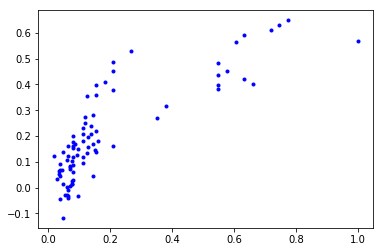

In [13]:
plt.plot(Y_test,Ypr,'b.')

In [17]:
# We might want to look at the data after expanding the categories
df_ext.to_csv("servo.dat")

Time to explore!

How does the estimator predict the training data? Is it much better than the test data, or roughly the same? What conclusions can we draw from this?

How about changing the network parameters?
- Increase or decrease the hidden layer size
- Add another hidden layer
- Change the learning meta-parameters
- ... or your idea?

Can you find on the net a successful attempt at learning this data?